In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os

In [3]:
os.chdir( "/content/gdrive/MyDrive/flair" ) 

In [4]:
pip install flair

     |████████████████████████████████| 286kB 10.0MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 2.3MB 28.4MB/s 
     |████████████████████████████████| 71kB 9.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 798kB 42.2MB/s 
     |████████████████████████████████| 983kB 30.9MB/s 
     |████████████████████████████████| 1.2MB 35.2MB/s 
     |████████████████████████████████| 19.7MB 1.4MB/s 
     |████████████████████████████████| 3.3MB 38.6MB/s 
     |████████████████████████████████| 901kB 44.9MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-cp37-none-any.whl size=9693 sha256=cb61393cafc6f6c20afa4a083a767b102acef1a751388d78416d9cdd5c392cc7
  Stored in directory: /root/.cache/pip/wheels/81/d0/d7/d9983facc6f2775411803e0e2d30ebf98efbf2fc6e57701e09
Successfully built gdown
  Created wheel for ftfy: filename=

In [5]:
from flair.data import Corpus
from flair.data_fetcher import NLPTaskDataFetcher

downsample = 1.0 # 1.0 is full data, try a much smaller number like 0.01 to test run the code
data_folder = os.getcwd()
columns = {0: 'text', 1: 'ner'}

# 1. get the corpus
corpus: Corpus = NLPTaskDataFetcher.load_column_corpus(data_folder, columns,
                                                             train_file='training_data.csv',
                                                             test_file='test_data.csv',
                                                           dev_file=None).downsample(downsample)
print(corpus)

2021-06-02 01:10:57,199 Reading data from /content/gdrive/My Drive/flair
2021-06-02 01:10:57,200 Train: /content/gdrive/My Drive/flair/training_data.csv
2021-06-02 01:10:57,204 Dev: None
2021-06-02 01:10:57,207 Test: /content/gdrive/My Drive/flair/test_data.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated function (or staticmethod) load_column_corpus. (Use 'flair.datasets' instead.) -- Deprecated since version 0.4.1.
  if sys.path[0] == '':


Corpus: 32819 train + 3646 dev + 0 test sentences


Now, we have loaded __flair__ and our data.<br>
Next, we train models for __NER__.<br>
Inform yourselves on [Embeddings](https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_3_WORD_EMBEDDING.md) in Flair.<br>
__Question 1__: What happens when we stack embeddings?<br>
How does this influence computational running time and accuracy?<br>
What does the __hidden_size__ of the __SequenceTagger__ reference?<br>
What happens when you increase/decrease the __hidden_size__?

In [7]:
# 4. initialize embeddings. Experiment with different embedding types to see what gets the best results
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings,FlairEmbeddings, CharacterEmbeddings

embedding_types = [
    WordEmbeddings('glove'),
    # comment in this line to use character embeddings
    #CharacterEmbeddings(),

    # comment in these lines to use flair embeddings (needs a LONG time to train :-)
    #FlairEmbeddings('news-forward'),
    #FlairEmbeddings('news-backward'),
]

embeddings: StackedEmbeddings = StackedEmbeddings(embeddings=embedding_types)

# 5. initialize sequence tagger
from flair.models import SequenceTagger

tag_dictionary = corpus.make_tag_dictionary(tag_type='ner') #added as it gave NameError

tagger: SequenceTagger = SequenceTagger(hidden_size=256, embeddings=embeddings,tag_dictionary = tag_dictionary, tag_type='ner', use_crf=True)

Start Training

In [8]:
# 6. initialize trainer
from flair.trainers import ModelTrainer

trainer: ModelTrainer = ModelTrainer(tagger, corpus)

model_name = 'flair_glove'

trainer.train(model_name,
              learning_rate=0.1,
              mini_batch_size=10,
              #anneal_with_restarts=True,
              max_epochs=5)

2021-06-02 01:12:52,038 ----------------------------------------------------------------------------------------------------
2021-06-02 01:12:52,042 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings('glove')
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=100, out_features=100, bias=True)
  (rnn): LSTM(100, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=512, out_features=5, bias=True)
  (beta): 1.0
  (weights): None
  (weight_tensor) None
)"
2021-06-02 01:12:52,044 ----------------------------------------------------------------------------------------------------
2021-06-02 01:12:52,047 Corpus: "Corpus: 32819 train + 3646 dev + 0 test sentences"
2021-06-02 01:12:52,049 ----------------------------------------------------------------------------------------------------
2021-06-02 01:12:52,051 Parameters:
2021-06-02 01:12:52,052  - learning_r

{'dev_loss_history': [0.00026301146135665476,
  0.00011936816008528695,
  7.855127478251234e-05,
  5.665153730660677e-05,
  4.3674033804563805e-05],
 'dev_score_history': [1.0, 1.0, 1.0, 1.0, 1.0],
 'test_score': 0,
 'train_loss_history': [0.01287043144387626,
  0.0002235924010680887,
  0.00012464368457547288,
  8.533084067673486e-05,
  6.564048124234051e-05]}

2021-06-02 01:23:15,964 ----------------------------------------------------------------------------------------------------
2021-06-02 01:23:15,966 WARNING: No LOSS found for test split in this data.
2021-06-02 01:23:15,967 Are you sure you want to plot LOSS and not another value?
2021-06-02 01:23:15,968 ----------------------------------------------------------------------------------------------------
2021-06-02 01:23:16,009 ----------------------------------------------------------------------------------------------------
2021-06-02 01:23:16,013 WARNING: No F1 found for test split in this data.
2021-06-02 01:23:16,015 Are you sure you want to plot F1 and not another value?
2021-06-02 01:23:16,021 ----------------------------------------------------------------------------------------------------


No handles with labels found to put in legend.


Loss and F1 plots are saved in /content/gdrive/My Drive/flair/flair_glove/training.png


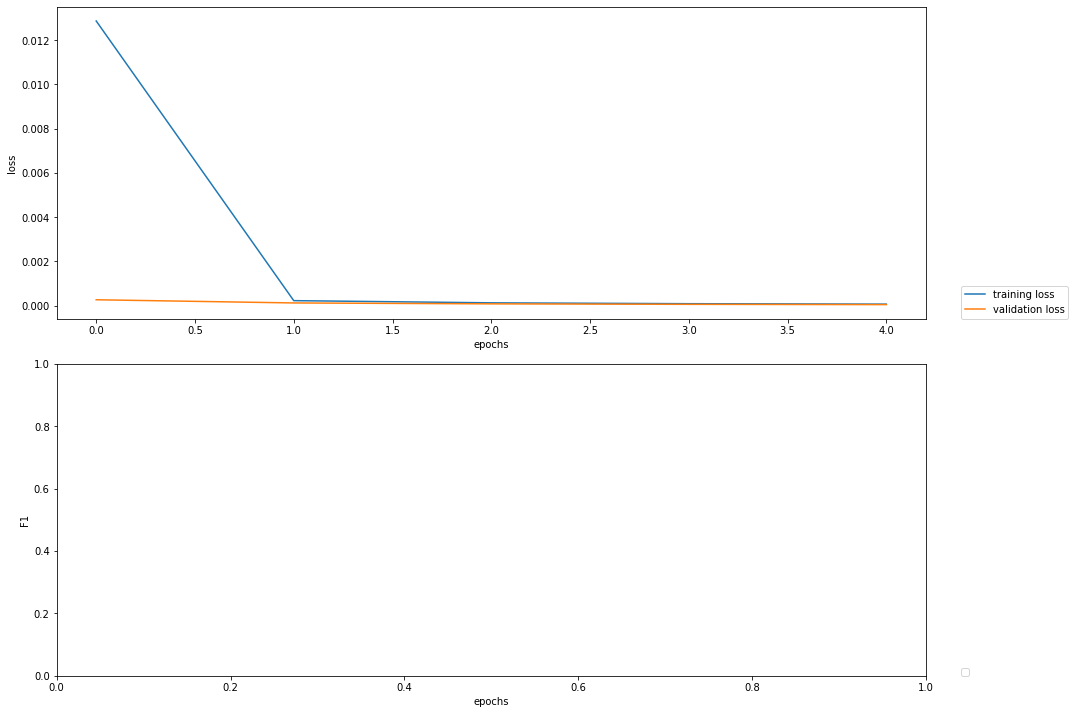

In [9]:
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_training_curves( os.getcwd() + '/flair_glove/loss.tsv')

__Question 2__: Suggest, how could you improve the F1-value?<br>
Are 5 epochs enough for training?<br>
How could you speed up computation?